In [1]:
import numpy as np
import matplotlib.pyplot as plt
import contextlib


# Generating random cluster means for Llyod's algorithm
# "initializing randomly several times necessary to obtain a good clustering solution"
@contextlib.contextmanager
def temp_seed(seed):
    state = np.random.get_state()
    np.random.seed(seed)
    try:
        yield
    finally:
        np.random.set_state(state)


def get_data():
    data_arr = []
    for _ in np.arange(0, n, 1):
        i = np.random.randint(0, 100)
        if i < 4:
            data_arr.append(np.array([0, np.random.normal(0, np.sqrt(0.4)), np.random.normal(0, np.sqrt(0.4))]))
        elif i - 4 < 30:
            data_arr.append(np.array([1, np.random.normal(0, sqrt_2), np.random.normal(5, sqrt_2)]))
        elif i - 34 < 30:
            data_arr.append(np.array([2, np.random.normal(5, sqrt_2), np.random.normal(0, sqrt_2)]))
        else:
            data_arr.append(np.array([3, np.random.normal(5, sqrt_2), np.random.normal(5, sqrt_2)]))
    return np.asarray(data_arr)


def get_cluster_assignments(cluster_means_arr, k=4):
    J = 0
    cluster_assignment_arr = []
    cluster_size = np.zeros(k)

    for pt in data:
        dist_pt_to_cluster_mean = []
        for cluster_mean in cluster_means_arr:
            dist_pt_to_cluster_mean.append(np.power(cluster_mean[0] - pt[1], 2) + np.power(cluster_mean[1] - pt[2], 2))

        cluster_assignment = np.argmin(dist_pt_to_cluster_mean)
        J += np.min(dist_pt_to_cluster_mean)
        cluster_assignment_arr.append(cluster_assignment)
        cluster_size[cluster_assignment] += 1

    return cluster_assignment_arr, cluster_size, J


def update_cluster_means(cluster_assignment_arr, cluster_size, k=4):
    iter_cluster_means_arr = np.zeros((k, 2))

    for pt, cluster_assignment in zip(data, cluster_assignment_arr):
        iter_cluster_means_arr[cluster_assignment] += pt[1:]

    for i in np.arange(0, k, 1):
        iter_cluster_means_arr[i] /= cluster_size[i]

    return iter_cluster_means_arr


def get_plus_plus_cluster_means_initializations(k):
    cluster_means_arr = []
    cluster_means_arr.append(data[np.random.randint(0, 1000), 1:])

    for _ in np.arange(1, k, 1):
        prob_dist = []
        prob_dist_sum = 0
        for pt in data:
            dist_pt_to_cluster_mean = []
            for cluster_mean in cluster_means_arr:
                dist_pt_to_cluster_mean.append(np.power(cluster_mean[0] - pt[1], 2) + np.power(cluster_mean[1] - pt[2], 2))

            prob_dist.append(np.min(dist_pt_to_cluster_mean))
            prob_dist_sum += np.min(dist_pt_to_cluster_mean)

        plus_plus_rand_index = np.random.choice(np.arange(0, 1000, 1), p=prob_dist / prob_dist_sum)
        cluster_means_arr.append(data[plus_plus_rand_index, 1:])

    return cluster_means_arr


def get_random_cluster_means_initializations(k):
    with temp_seed(np.random.seed(np.random.randint(0, 100))):
        rand_cluster_means = np.random.rand(k, 2)
    return rand_cluster_means


def get_color(cluster_id):
    if cluster_id == 0:
        return 'blue'
    elif cluster_id == 1:
        return 'red'
    elif cluster_id == 2:
        return 'green'
    else:
        return 'pink'


def run_kmeans(k=4, kmeans_plus_plus=True, plot=False, subplot=False, ax=None, trial_num=1):
    j_arr_plus = []
    if kmeans_plus_plus:
        cluster_means_arr = get_plus_plus_cluster_means_initializations(k)
    else:
        cluster_means_arr = get_random_cluster_means_initializations(k)
    for _ in np.arange(0, iterations, 1):
        cluster_assignment_arr, cluster_size, J = get_cluster_assignments(cluster_means_arr, k)
        cluster_means_arr = update_cluster_means(cluster_assignment_arr, cluster_size, k)
        j_arr_plus.append(J)

    if plot:
        plt.plot(j_arr_plus, label="trial:"+str(trial_num))
        plt.ylabel("J")
        plt.xlabel("iterations")
        if kmeans_plus_plus:
            plt.title("k-means plus plus : J vs iterations")
        else:
            plt.title("llyod k-means : J vs iterations")

    if subplot and not kmeans_plus_plus:
        color = np.array([get_color(x) for x in cluster_assignment_arr])
        ax.scatter(data[:, 1], data[:, 2], color=color, s=1)

    return j_arr_plus

# Part 1
## Is initializing randomly several times necessary to obtain a good clustering solution? : No

Clusters look similar when running with different seed values.

/home/sandai/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


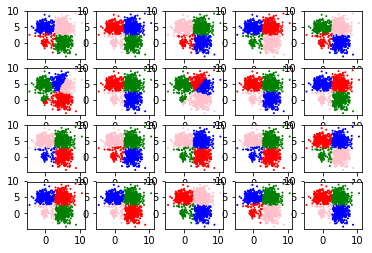

In [2]:
n = 1000
iterations = 15
trials = 20
sqrt_2 = np.sqrt(2)
data = get_data()

# K MEANS with Random Initialization of Cluster means 
sub_plot_rand_seed_plot = True
plot_J_simple_kmeans = False
opt_J_simple_kmeans_trials = []
llyod_rand_clusters = plt.figure()
for i in np.arange(1, trials + 1, 1):
    ax = llyod_rand_clusters.add_subplot(4, 5, i)
    j_arr = run_kmeans(kmeans_plus_plus=False, plot=plot_J_simple_kmeans, trial_num=i, subplot=sub_plot_rand_seed_plot, ax=ax)
    opt_J_simple_kmeans_trials.append(j_arr[-1])

if sub_plot_rand_seed_plot:
    llyod_rand_clusters.show()

if plot_J_simple_kmeans:
    plt.legend()
    plt.show()

## mean and standard deviation of the k-means objective function J at the end of k-means iterations over 20 trials

In [3]:
print(np.mean(np.array(opt_J_simple_kmeans_trials)), np.std(np.array(opt_J_simple_kmeans_trials)))

3330.163830817073 150.8434641972863


In [4]:
# K MEANS PLUS PLUS
opt_J_plus_plus_trials = []
plot_J_plus = False
for i in np.arange(1, trials + 1, 1):
    j_arr = run_kmeans(kmeans_plus_plus=True, plot=plot_J_plus, trial_num=i)
    opt_J_plus_plus_trials.append(j_arr[-1])

if plot_J_plus:
    plt.legend()
    plt.show()

# Part 2
## mean and standard deviation of the k-means objective function J at the end of k-means++ iterations
## both k-means & k-means++ perform similarly

In [5]:
print(np.mean(np.array(opt_J_plus_plus_trials)), np.std(np.array(opt_J_plus_plus_trials)))

3413.677615206114 224.81615319591114


# Part 3
## Plot the Bayes Information criteria

One does not get k=4 using the bayes information criterion

In [6]:
# BAYES INFORMATION
bayes_info = []
for num_clusters in np.arange(2, 15, 1):
    n_ = run_kmeans(k=num_clusters)[-1] + num_clusters * np.log(n)
    bayes_info.append(n_)

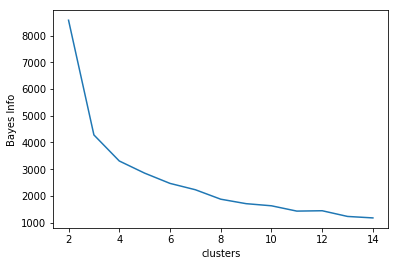

In [7]:
plt.ylabel("Bayes Info")
plt.xlabel("clusters")
plt.plot(np.arange(2, 15, 1), bayes_info)
plt.show()